<a href="https://colab.research.google.com/github/zurii-07/CM2604-ML-Coursework/blob/Develop/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading & Exploring the dataset.

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np

#Loading the dataset.
file_path = '/content/drive/MyDrive/ML CW /bank+marketing/bank-additional/bank-additional/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

#Exploring the dataset
print(data.head())
print(data.info())
print(data.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

2. Data Preprocessing

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Data Preprocessing

# 01. Checking for Missing values labeled as "Unknown" in categorical features.
categoricalFeatures = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

unknownCount = {col: (data[col] == 'unknown').sum() for col in categoricalFeatures}
print("01.Number of 'Unknown' values in categorical features: ")
print(unknownCount)
print("\n")


# 1.1 Replacing missing "Unknown" values with the most frequent category.
for col in categoricalFeatures:
    mostFrequentCategory = data[col].mode()[0]
    data[col] = data[col].replace('unknown', mostFrequentCategory)

print("1.1.After replacing 'Unknown' values with the most frequent category: ")
print("\n")
print(data.head(10))
print("\n")

# 1.2 Getting counts for each category in categorical features.
print("1.2.Counts for each category in categorical features: ")
print("\n")
for col in categoricalFeatures:
    print(f"Counts for the feature, '{col}':")
    print(data[col].value_counts())
    print("\n")

# 02. Feature Engineering / Encoding Categorical Features.

#Lable encoding the target variable 'y'
labelEncoder = LabelEncoder()
data['y'] = labelEncoder.fit_transform(data['y'])

#One-hot encoding the categorical features.
encodedData = pd.get_dummies(data, columns=categoricalFeatures, drop_first=True)

#Displaying the processed data.
print("\n 02.Processed Data with Encoded Categorical Features(with First 5 rows):")
print("\n")
print(encodedData.head(10))
print("\n")


# 3. Data Normalization / Scaling

#Identifying numerical features
numericalFeatures = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#Initializing MinMaxScaler or StandardScaler to normalize the data.
scaler = MinMaxScaler()

#Scaling the numerical features.
scaledNumericalData = scaler.fit_transform(encodedData[numericalFeatures])
scaledNumericalData = pd.DataFrame(scaledNumericalData, columns=numericalFeatures)

# Replacing the scaled numerical features in the dataset.
encodedData[numericalFeatures] = scaledNumericalData

#Displaying the scaled data.
print("\n 03.Scaled Data (with First 5 rows):")
print("\n")
print(encodedData.head(10))
print("\n")


# 04. Handling Class Imbalances using SMOTE.

from imblearn.over_sampling import SMOTE

#separating features and target variable.
X = encodedData.drop('y', axis=1)
y = encodedData['y']

#Initializing SMOTE to handle class imbalances.
smote = SMOTE(random_state=42)

# Applying SMOTE to generate balanced data.
X_resampled, y_resampled = smote.fit_resample(X, y)

#Creating a new DataFrame with the balanced dataset.
balancedData = pd.DataFrame(X_resampled, columns=X.columns)
balancedData['y'] = y_resampled

#Displaying the balanced data.
print("\n 04.Balanced Data after applying SMOTE (Class Distriution):")
print("\n")
print(balancedData['y'].value_counts())
print("\n")


01.Number of 'Unknown' values in categorical features: 
{'job': 330, 'marital': 80, 'education': 1731, 'default': 8597, 'housing': 990, 'loan': 990, 'contact': 0, 'month': 0, 'day_of_week': 0, 'poutcome': 0}


1.1.After replacing 'Unknown' values with the most frequent category: 


   age          job  marital            education default housing loan  \
0   56    housemaid  married             basic.4y      no      no   no   
1   57     services  married          high.school      no      no   no   
2   37     services  married          high.school      no     yes   no   
3   40       admin.  married             basic.6y      no      no   no   
4   56     services  married          high.school      no      no  yes   
5   45     services  married             basic.9y      no      no   no   
6   59       admin.  married  professional.course      no      no   no   
7   41  blue-collar  married    university.degree      no      no   no   
8   24   technician   single  professional.course  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



 04.Balanced Data after applying SMOTE (Class Distriution):


y
0    36548
1    36548
Name: count, dtype: int64




3. Saving the processed dataset as a new Dataset.

In [10]:
#Saving the above cleaned data to a new csv file.

newFilePath = '/content/drive/MyDrive/ML CW /bank-additional-full-cleaned.csv'
balancedData.to_csv(newFilePath, index=False)
print(f"Processed and balanced dataset saved to {newFilePath}")

Processed and balanced dataset saved to /content/drive/MyDrive/ML CW /bank-additional-full-cleaned.csv


4. Splitting the Dataset

In [14]:
# 04.Loading & Splitting the new dataset into training(70%), validation(15%) and testing(15%) sets.

import pandas as pd

# 4.1 Loading the new dataset.
file_path = '/content/drive/MyDrive/ML CW /bank-additional-full-cleaned.csv'
data = pd.read_csv(file_path)

#Displaying the first 5 rows of the dataset to understand its structure.
data.head(), data.shape

# 4.2 Splitting the dataset into training (70%), validation (15%), and testing (15%).
from sklearn.model_selection import train_test_split

#Split the data into training(70%) and temp (30% for validation and testing).
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)

#Split the temp data into validation(15%) and testing().
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#Verifying the sizes of the splits.
print(f"Training Set Size: {len(train_data)}")
print(f"Validation Set Size: {len(validation_data)}")
print(f"Testing Set Size: {len(test_data)}")


Training Set Size: 51167
Validation Set Size: 10964
Testing Set Size: 10965


5. Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable
X_train = train_data.drop(columns='y')
y_train = train_data['y']
X_val = validation_data.drop(columns='y')
y_val = validation_data['y']
X_test = test_data.drop(columns='y')  # Testing set features.
y_test = test_data['y']  # Testing set target lables.

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Validate performance on the validation set
y_val_pred = best_rf_model.predict(X_val)
classification_report_val = classification_report(y_val, y_val_pred)

# Evaluate performance on the training set
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate performance on the testing set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

#Getting the evaluation metrics.
print("Best Hyperparameters:", grid_search.best_params_)
print("\nValidation Set Classification Report:\n", classification_report_val)
print("\nTraining Set Accuracy:", train_accuracy)
print("\nTesting Set Accuracy:", test_accuracy)
print("\nTesting Set Classification Report:\n", classification_report_test)

Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      5491
           1       0.92      0.98      0.95      5473

    accuracy                           0.95     10964
   macro avg       0.95      0.95      0.95     10964
weighted avg       0.95      0.95      0.95     10964


Training Set Accuracy: 1.0

Testing Set Accuracy: 0.9521203830369357

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      5514
           1       0.92      0.98      0.95      5451

    accuracy                           0.95     10965
   macro avg       0.95      0.95      0.95     10965
weighted avg       0.95      0.95      0.95     10965



6. Feedforward Neural Network

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8137 - loss: 0.4103 - val_accuracy: 0.9030 - val_loss: 0.2475
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8986 - loss: 0.2668 - val_accuracy: 0.9075 - val_loss: 0.2366
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8988 - loss: 0.2592 - val_accuracy: 0.9076 - val_loss: 0.2315
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9028 - loss: 0.2489 - val_accuracy: 0.9110 - val_loss: 0.2277
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9074 - loss: 0.2391 - val_accuracy: 0.9146 - val_loss: 0.2212
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9069 - loss: 0.2368 - val_accuracy: 0.9163 - val_loss: 0.2185
Epoch 7/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9102 - loss: 0.2324 - val_accuracy: 0.9175 - val_loss: 0.2173
Epoch 8/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.2305 - val_accurac

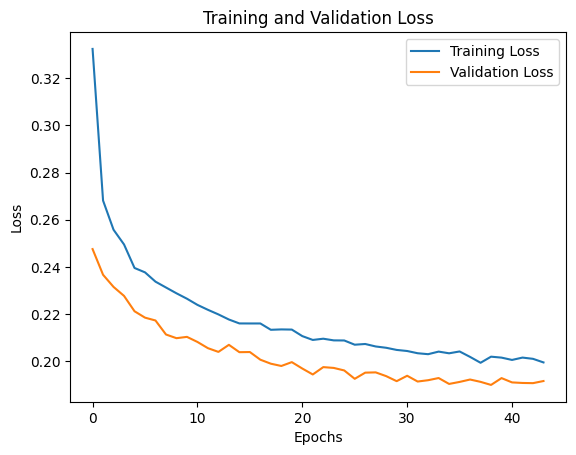

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Separate features and target variable
X_train = train_data.drop(columns='y')
y_train = train_data['y']
X_val = validation_data.drop(columns='y')
y_val = validation_data['y']
X_test = test_data.drop(columns='y')
y_test = test_data['y']

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the feedforward neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input and first hidden layer
    Dropout(0.3),                                              # Dropout for regularization
    Dense(32, activation='relu'),                             # Second hidden layer
    Dropout(0.3),                                              # Dropout for regularization
    Dense(1, activation='sigmoid')                             # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,                 # Number of epochs
    batch_size=32,             # Batch size
    callbacks=[early_stopping], # Early stopping callback
    verbose=1                  # Display training progress
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\nTest Set Accuracy:", test_accuracy)
print("\nTest Set Loss:", test_loss)

# Plot training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
